# Image Processing.
<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>
- GITAM Institute of Science.

<p>YouTube link: <a href = 'https://www.youtube.com/playlist?list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW'>Image Processing with Python by Sreeni</a></p>

## Lesson 1: Understanding digital images for processing in Python.

### Necessary libraries.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'C:\Users\acer\Pictures\Wallpapers')

In [3]:
myimage = io.imread('abc.jpg')

In [4]:
myimage.shape

(3590, 5385, 3)

##### 3 represents the R, G and B channels.

In [5]:
myimage[0]

array([[239, 182,   7],
       [239, 182,   7],
       [239, 182,   5],
       ...,
       [253, 190,   0],
       [253, 190,   0],
       [254, 191,   0]], dtype=uint8)

In [6]:
print(myimage.min(),myimage.max())

0 255


##### The data type of 'myimage' is <b>uint8</b>. This means the color channel values of the pixels can be in the range [0,255] i.e Upper Bound for this value is 2^8 - 1 = 255.

## Visualizing the image in matplotlib.

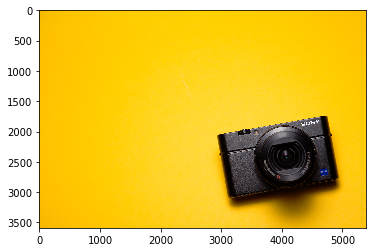

In [7]:
plt.imshow(myimage)
plt.show()

## Visualize random pixels in an image.

In [8]:
randomImage = np.random.randint(0,256, size = (100,100,3))

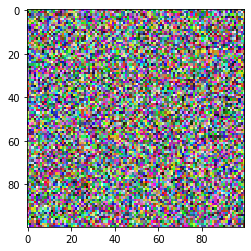

In [9]:
plt.imshow(randomImage)
plt.show()

In [10]:
randomImage[0:5,20:30] = [255,0,0]

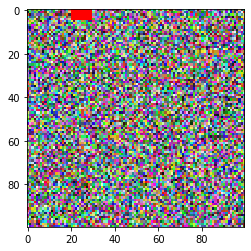

In [11]:
plt.imshow(randomImage)
plt.show()

#### We can also pass in normalized values of RGB.

In [12]:
from skimage import img_as_float

In [13]:
floatImage = img_as_float(randomImage)

In [14]:
floatImage[0][2]

array([5.93718141e-08, 5.05242497e-08, 3.18977982e-08])

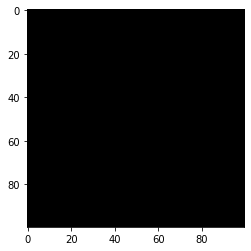

In [15]:
plt.imshow(floatImage)
plt.show()

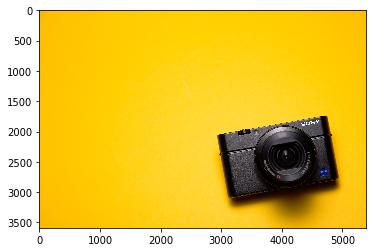

In [16]:
plt.imshow(img_as_float(myimage))
plt.show()

<hr><hr>

## Lesson 2: Reading Images in Python.

### Necessary librarires.

In [17]:
from PIL import Image

In [18]:
img = Image.open('abc.jpg')

In [19]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [20]:
print(img.format)

JPEG


##### Imported as jpeg NOT numpy array.

### Converting the image as an array.

In [21]:
img1 = np.asarray(img)

In [22]:
print(type(img1))

<class 'numpy.ndarray'>


In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [24]:
img = mpimg.imread('abc.jpg')

In [25]:
type(img)

numpy.ndarray

##### Directly imported as ndarray unlike PIL.Image

In [26]:
img.shape

(3590, 5385, 3)

## Lesson 3: Imgae processing using skimage.

In [56]:
from skimage import io
import matplotlib.pyplot as plt

### Importing the image as grayscale.

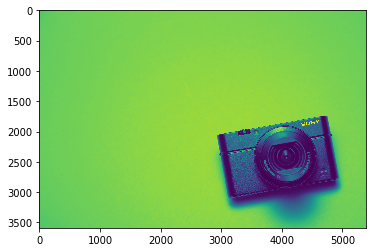

In [38]:
img = io.imread('abc.jpg', as_gray = True)
plt.imshow(img)
plt.show()

### Shape of the original image.

In [40]:
img.shape

(3590, 5385)

# Image Transformation.

In [57]:
# To transform an image, we do have some functions like rescaling, resizing and downscaling.
from skimage.transform import rescale, resize, downscale_local_mean

### Rescaling the image.
- Scale image by a certain factor.

In [48]:
rescaled_img = rescale(img, scale = 1/4, anti_aliasing = True)
rescaled_img.shape

(898, 1346)

In [47]:
round(img.shape[0]/4), round(img.shape[1]/4)

(898, 1346)

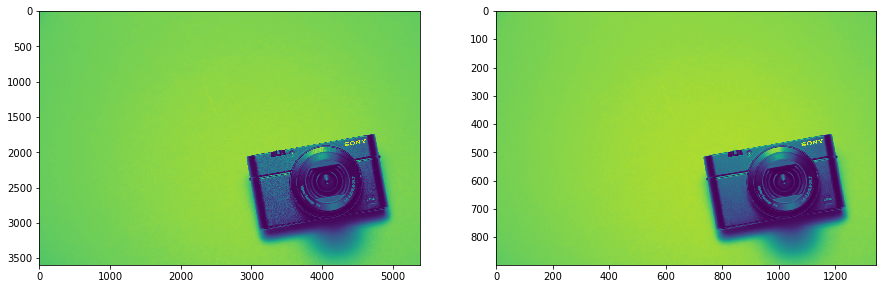

In [53]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(rescaled_img)

plt.show()

##### Look at the change in axes ticks.

<hr>

### Resizing the image.
- Resize image to match a certain size.


In [54]:
resized_img = resize(img, output_shape = (200,150), anti_aliasing = True )
resized_img.shape

(200, 150)

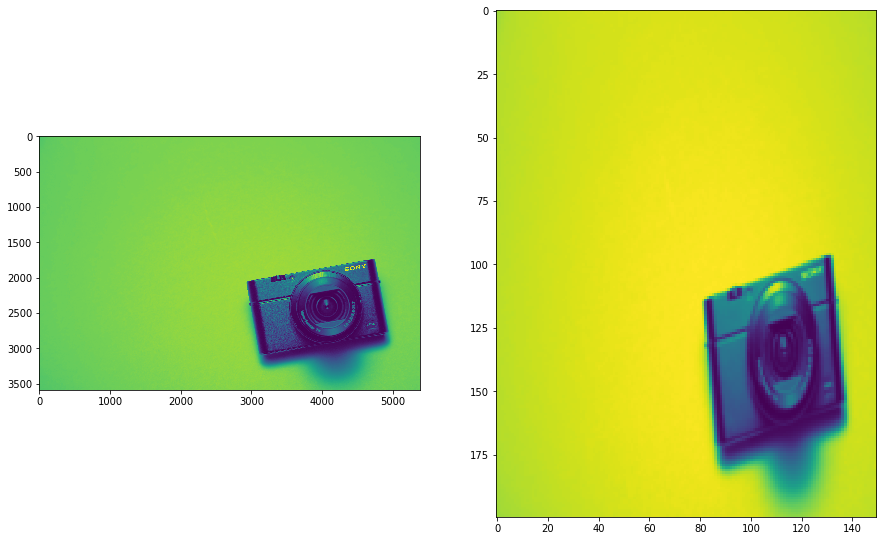

In [55]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(resized_img)

plt.show()

<hr>

### Downscale using local mean.
- Down-sample N-dimensional image by local averaging.

In [58]:
downscaled_img = downscale_local_mean(img, factors = (2,3))
downscaled_img.shape

(1795, 1795)

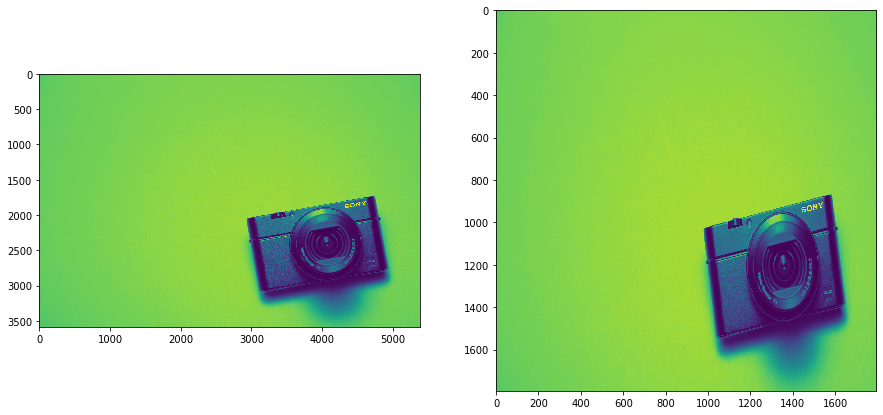

In [59]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(downscaled_img)

plt.show()

<hr>

## Edge Filtering.

In [61]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [68]:
methods = (roberts, sobel, scharr, prewitt)
names = ['Roberts', 'Sobel', 'Scharr', 'Prewitt']

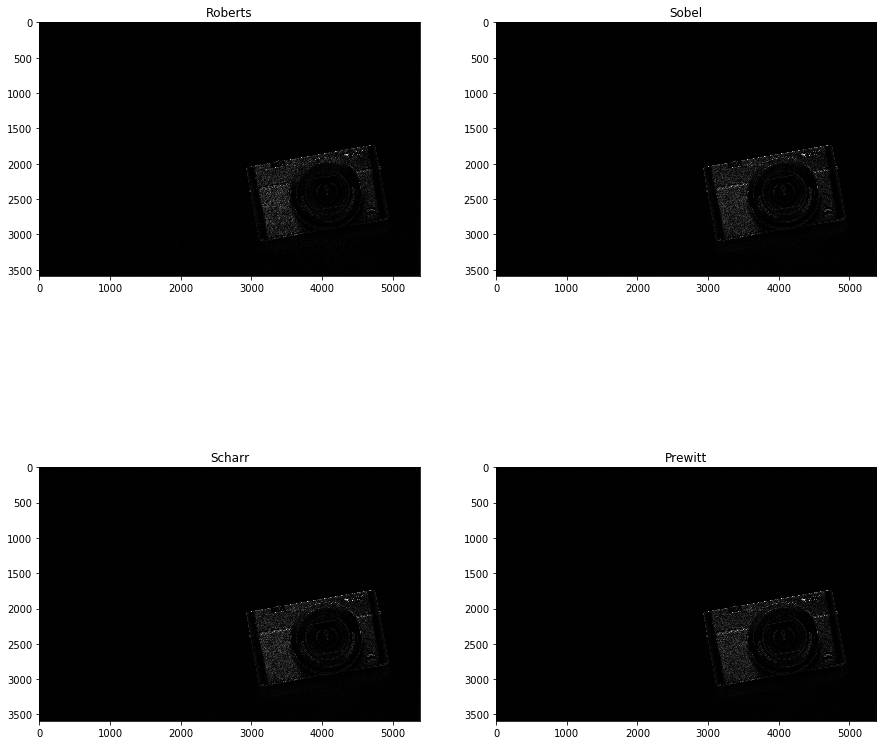

In [71]:
plt.figure(figsize = (15,15))

for ii in range(4):
    plt.subplot(2,2,ii+1)
    sample = methods[ii](img)
    plt.imshow(sample, cmap = 'gray')
    plt.title(names[ii])

plt.show()

### Another example.

In [72]:
os.chdir(r'C:\Users\acer\PycharmProjects\untitled')

In [73]:
img1 = io.imread('svr.jpg', as_gray = True)

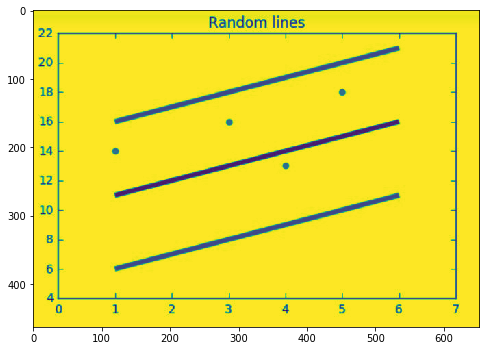

In [74]:
plt.figure(figsize = (8,8))
plt.imshow(img1)
plt.show()

### Using edge detection in this image.

In [76]:
from skimage.filters import roberts, sobel, scharr, prewitt, laplace
from skimage.feature import canny

In [77]:
methods = (roberts, sobel, scharr, prewitt, laplace, canny)
names = ['Roberts', 'Sobel', 'Scharr', 'Prewitt', 'Laplace', 'Canny']

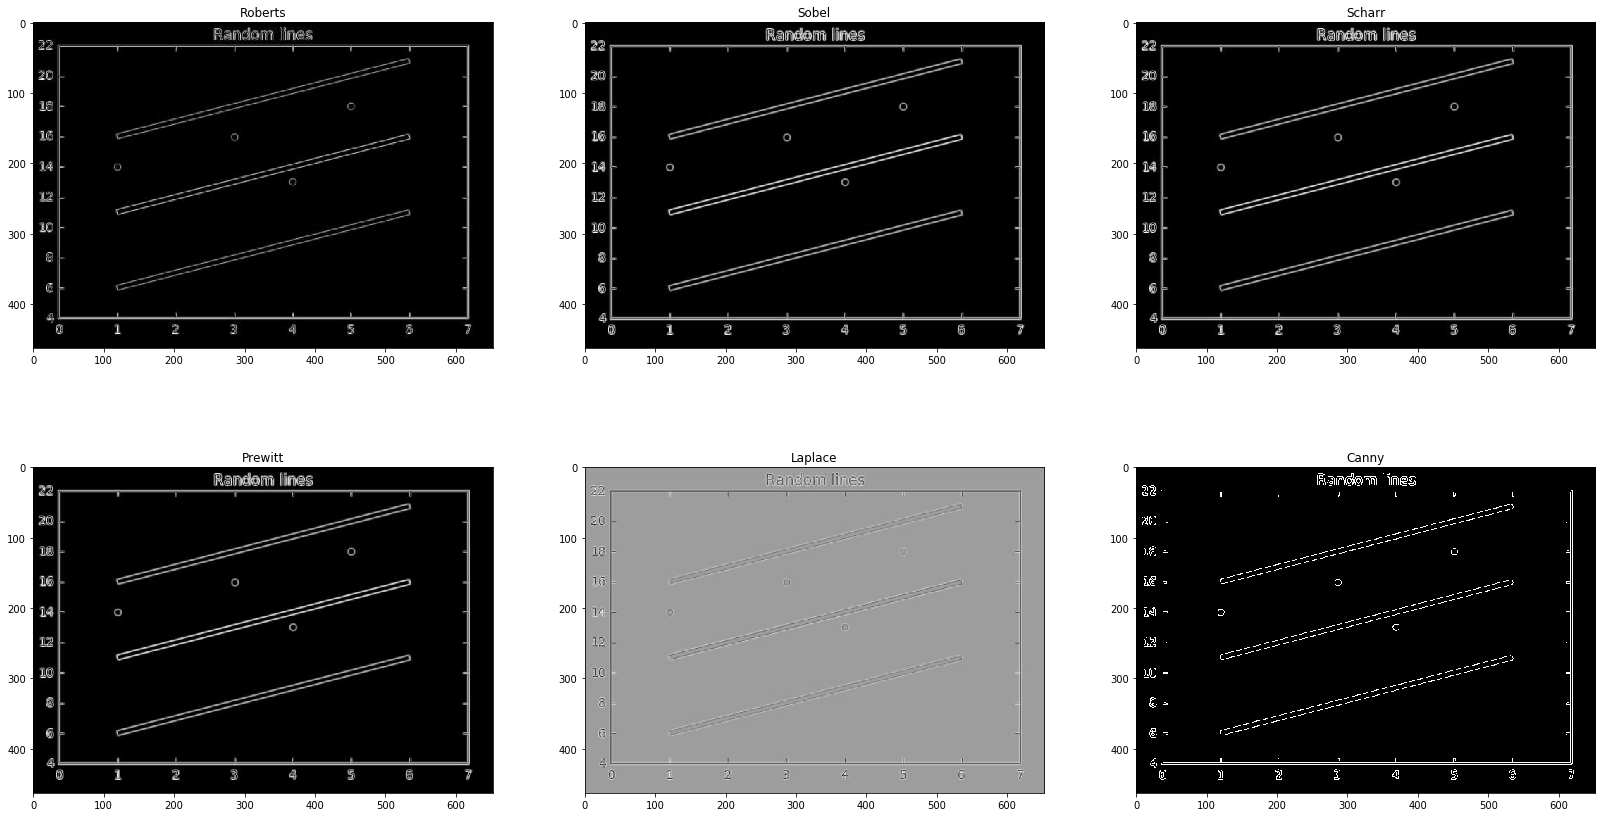

In [81]:
plt.figure(figsize = (28,15))

for ii in range(6):
    plt.subplot(2,3,ii+1)
    sample = methods[ii](img1)
    plt.imshow(sample, cmap = 'gray')
    plt.title(names[ii])

plt.show()

# The End.